In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


Ex1

In [2]:
df = pd.read_csv("Store_data_2025.csv", sep = ';')
df.head()

,storeNum,Year,Week,Date,Weekind,p1sales,p2sales,p1price,p2price,p1prom,p2prom,compind,storesize,city,citysize
0,101,2023,1,2023-01-02,1,359,436,2.79,2.59,0,0,-0.052,133,OSLO,580000
1,101,2023,2,2023-01-09,2,367,439,2.49,2.59,0,0,-0.052,133,OSLO,580000
2,101,2023,3,2023-01-16,3,360,435,2.19,2.59,0,0,-0.052,133,OSLO,580000
3,101,2023,4,2023-01-23,4,364,531,2.99,2.49,0,1,-0.052,133,OSLO,580000
4,101,2023,5,2023-01-30,5,360,439,2.49,2.29,0,0,-0.052,133,OSLO,580000


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [4]:
#treatment store
store_109 = df[df['storeNum'] == 109].copy()
store_109.head()

,storeNum,Year,Week,Date,Weekind,p1sales,p2sales,p1price,p2price,p1prom,p2prom,compind,storesize,city,citysize
832,109,2023,1,2023-01-02,1,286,306,2.49,2.99,0,0,0.271,101,STAV,121610
833,109,2023,2,2023-01-09,2,286,308,2.99,3.19,0,0,0.271,101,STAV,121610
834,109,2023,3,2023-01-16,3,285,313,2.99,2.29,0,0,0.271,101,STAV,121610
835,109,2023,4,2023-01-23,4,283,310,2.99,2.29,0,0,0.271,101,STAV,121610
836,109,2023,5,2023-01-30,5,283,374,2.29,2.49,0,1,0.271,101,STAV,121610


In [5]:
store_109['Post'] = (store_109['Weekind'] >= 78).astype(int)
store_109.head()


,storeNum,Year,Week,Date,Weekind,p1sales,p2sales,p1price,p2price,p1prom,p2prom,compind,storesize,city,citysize,Post
832,109,2023,1,2023-01-02,1,286,306,2.49,2.99,0,0,0.271,101,STAV,121610,0
833,109,2023,2,2023-01-09,2,286,308,2.99,3.19,0,0,0.271,101,STAV,121610,0
834,109,2023,3,2023-01-16,3,285,313,2.99,2.29,0,0,0.271,101,STAV,121610,0
835,109,2023,4,2023-01-23,4,283,310,2.99,2.29,0,0,0.271,101,STAV,121610,0
836,109,2023,5,2023-01-30,5,283,374,2.29,2.49,0,1,0.271,101,STAV,121610,0


I want to see if there's a difference in average weekly sales after the strategy (Post = 1) compared to before (Post = 0), while accounting for differences in price.

In [6]:
model_p1 = smf.ols("p1sales ~ Post + p1price", data=store_109).fit()
model_p1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                p1sales   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     76.94
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           4.99e-21
Time:                        14:49:50   Log-Likelihood:                -423.45
No. Observations:                 104   AIC:                             852.9
Df Residuals:                     101   BIC:                             860.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    312.8794     11.931     26.225      0.000     289.212     336.546
Post          39.8962      3.222     12.384      0.000      33.505      46.287
p1price       -4.4994      4.628     -0.972      0.333     -13.679       4.680
==============================================================================
Omnibus:                       18.248   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.389
Skew:                           1.128   Prob(JB):                     1.38e-05
Kurtosis:                       3.274   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
model_p2 = smf.ols("p2sales ~ Post + p2price", data=store_109).fit()
model_p2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                p2sales   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     4.525
Date:                Mon, 31 Mar 2025   Prob (F-statistic):             0.0131
Time:                        14:49:55   Log-Likelihood:                -498.67
No. Observations:                 104   AIC:                             1003.
Df Residuals:                     101   BIC:                             1011.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    394.6577     23.685     16.663      0.000     347.673     441.642
Post          -8.0337      6.662     -1.206      0.231     -21.249       5.182
p2price      -23.0707      8.715     -2.647      0.009     -40.358      -5.783
==============================================================================
Omnibus:                       19.073   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.299
Skew:                           1.183   Prob(JB):                     5.29e-06
Kurtosis:                       3.116   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

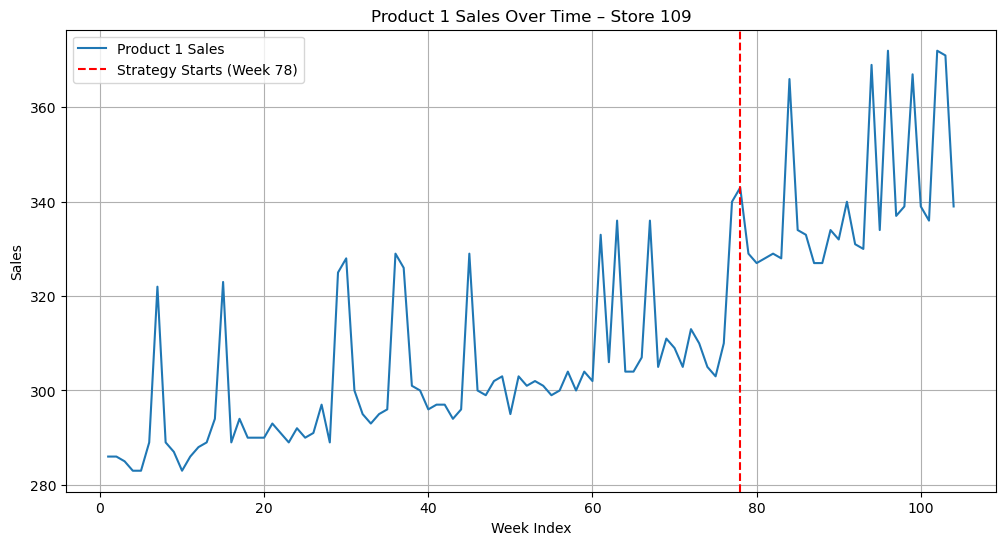

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(store_109['Weekind'], store_109['p1sales'], label='Product 1 Sales')
plt.axvline(x=78, color='red', linestyle='--', label='Strategy Starts (Week 78)')
plt.title('Product 1 Sales Over Time – Store 109')
plt.xlabel('Week Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

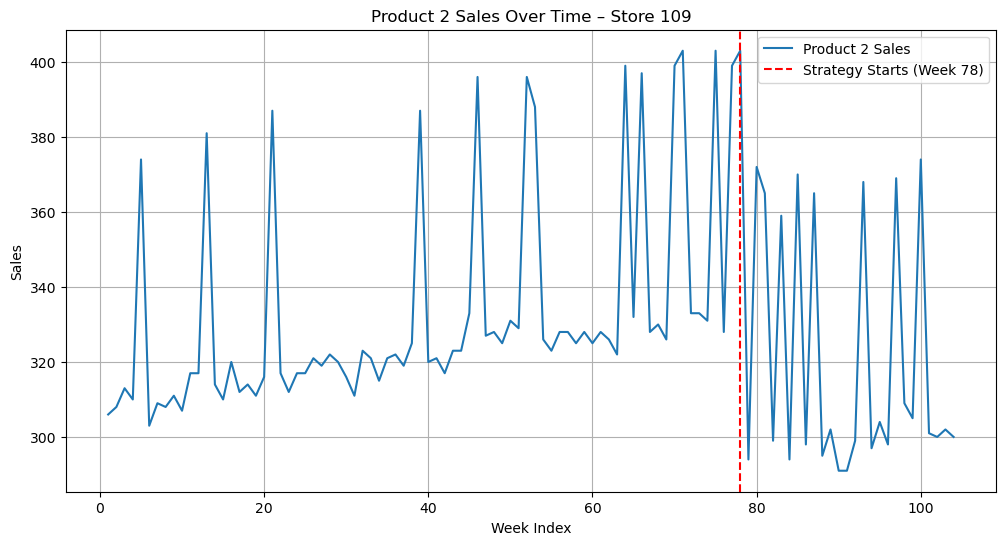

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(store_109['Weekind'], store_109['p2sales'], label='Product 2 Sales')
plt.axvline(x=78, color='red', linestyle='--', label='Strategy Starts (Week 78)')
plt.title('Product 2 Sales Over Time – Store 109')
plt.xlabel('Week Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

Ex2

To find a good control group with parallel trends assumption

In [10]:
df[df['storeNum'] == 109][['storeNum', 'storesize', 'citysize', 'city']].drop_duplicates()

,storeNum,storesize,citysize,city
832,109,101,121610,STAV


In [11]:
similar_stores = df[
    (df['city'] == 'STAV') &
    (df['storeNum'] != 109)
]['storeNum'].unique()

similar_stores

array([110, 111], dtype=int64)

So we can take stores 110 and 111 as a control group because they did not receive treatment and they are the most similar stores

In [12]:
treated = df[df['storeNum'] == 109]
control = df[df['storeNum'].isin([110, 111])]
did = pd.concat([treated, control], axis=0).copy()

did['Post'] = (did['Weekind'] >= 78).astype(int)
did['Treated'] = (did['storeNum'] == 109).astype(int)
did['DID'] = did['Post'] * did['Treated']
did

,storeNum,Year,Week,Date,Weekind,p1sales,p2sales,p1price,p2price,p1prom,p2prom,compind,storesize,city,citysize,Post,Treated,DID
832,109,2023,1,2023-01-02,1,286,306,2.49,2.99,0,0,0.271,101,STAV,121610,0,1,0
833,109,2023,2,2023-01-09,2,286,308,2.99,3.19,0,0,0.271,101,STAV,121610,0,1,0
834,109,2023,3,2023-01-16,3,285,313,2.99,2.29,0,0,0.271,101,STAV,121610,0,1,0
835,109,2023,4,2023-01-23,4,283,310,2.99,2.29,0,0,0.271,101,STAV,121610,0,1,0
836,109,2023,5,2023-01-30,5,283,374,2.29,2.49,0,1,0.271,101,STAV,121610,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,111,2024,48,2024-12-02,100,205,287,2.19,3.19,0,1,-0.747,144,STAV,121610,1,0,0
1140,111,2024,49,2024-12-09,101,194,228,2.79,2.59,0,0,-0.747,144,STAV,121610,1,0,0
1141,111,2024,50,2024-12-16,102,211,230,2.99,2.99,1,0,-0.747,144,STAV,121610,1,0,0
1142,111,2024,51,2024-12-23,103,215,228,2.49,2.59,1,0,-0.747,144,STAV,121610,1,0,0


In [13]:
did_p1 = smf.ols("p1sales ~ Treated + Post + DID + p1price", data=did).fit()
did_p1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                p1sales   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     58.85
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           7.71e-37
Time:                        14:50:23   Log-Likelihood:                -1474.8
No. Observations:                 312   AIC:                             2960.
Df Residuals:                     307   BIC:                             2978.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    312.2688     13.390     23.321      0.000     285.921     338.616
Treated       23.5938      3.846      6.135      0.000      16.027      31.161
Post         -25.9095      4.358     -5.946      0.000     -34.484     -17.335
DID           65.9330      7.548      8.735      0.000      51.081      80.785
p1price      -13.4996      5.154     -2.619      0.009     -23.641      -3.358
==============================================================================
Omnibus:                        5.453   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.716
Skew:                          -0.105   Prob(JB):                        0.156
Kurtosis:                       2.508   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
did_p2 = smf.ols("p2sales ~ Treated + Post + DID + p2price", data=did).fit()
did_p2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                p2sales   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     9.086
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           5.99e-07
Time:                        14:50:27   Log-Likelihood:                -1540.9
No. Observations:                 312   AIC:                             3092.
Df Residuals:                     307   BIC:                             3110.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    327.7162     16.133     20.313      0.000     295.970     359.462
Treated       16.3469      4.753      3.440      0.001       6.995      25.699
Post         -18.8774      5.424     -3.480      0.001     -29.551      -8.204
DID            9.6594      9.332      1.035      0.301      -8.703      28.022
p2price       -4.2623      5.912     -0.721      0.471     -15.895       7.370
==============================================================================
Omnibus:                       16.911   Durbin-Watson:                   1.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.194
Skew:                           0.582   Prob(JB):                     0.000112
Kurtosis:                       3.207   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Product 1: The marketing strategy caused a significant sales increase of ~66 units/week, price significantly affects sales but there is a general decrease in sales post-period for all stores. The strategy worked for Product 1 — significant, large uplift after controlling for baseline trends and price.



Product 2: Sales dropped for everyone post-period, price effect not significant here and DID coefficient is not statistically significant


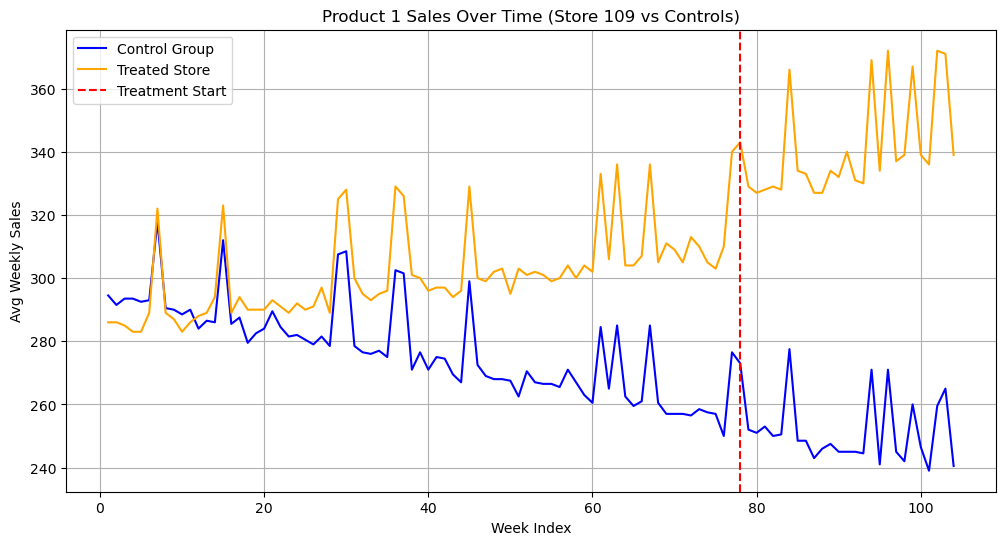

In [15]:
plot_df = did.groupby(['Weekind', 'storeNum', 'Treated'])[['p1sales']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_df[plot_df['Treated'] == 0], x='Weekind', y='p1sales', label='Control Group', color='blue', errorbar=None)
sns.lineplot(data=plot_df[plot_df['Treated'] == 1], x='Weekind', y='p1sales', label='Treated Store', color='orange', errorbar=None)
plt.axvline(x=78, color='red', linestyle='--', label='Treatment Start')

plt.title('Product 1 Sales Over Time (Store 109 vs Controls)')
plt.xlabel('Week Index')
plt.ylabel('Avg Weekly Sales')
plt.legend() 
plt.grid(True)
plt.show()

The treated and control groups had very similar and stable trends.

There’s a slight gap, but the trends move in parallel — satisfying the parallel trends assumption.

In the post-treatment the treated store’s sales clearly increase sharply.

Control store continues the same declining trend.

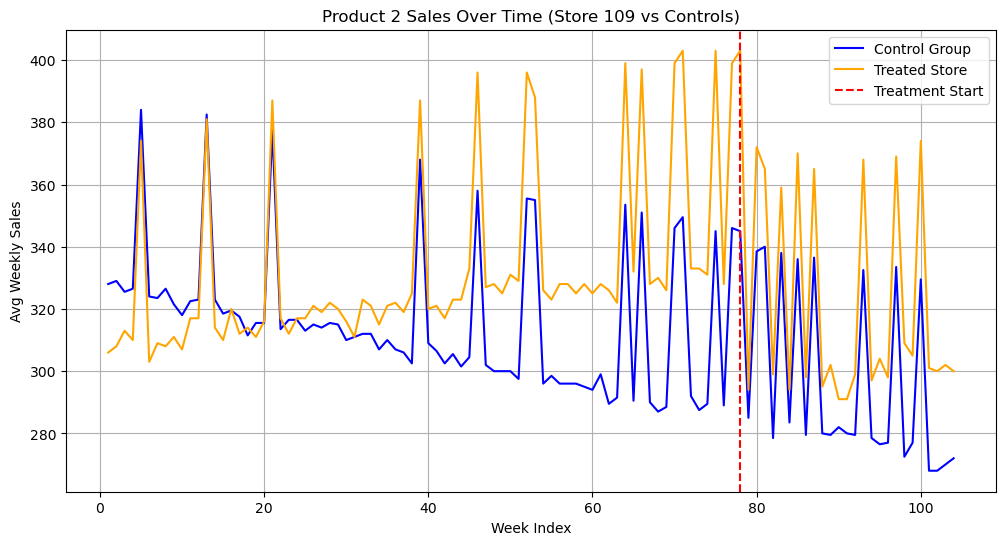

In [16]:
plot_df = did.groupby(['Weekind', 'storeNum', 'Treated'])[['p2sales']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_df[plot_df['Treated'] == 0], x='Weekind', y='p2sales', label='Control Group', color='blue', errorbar=None)
sns.lineplot(data=plot_df[plot_df['Treated'] == 1], x='Weekind', y='p2sales', label='Treated Store', color='orange', errorbar=None)
plt.axvline(x=78, color='red', linestyle='--', label='Treatment Start')

plt.title('Product 2 Sales Over Time (Store 109 vs Controls)')
plt.xlabel('Week Index')
plt.ylabel('Avg Weekly Sales')
plt.legend() 
plt.grid(True)
plt.show()

Treated and control are fluctuating a lot but they follow similar parallel trend. We can clearly see that after treatment, sales in the trated group started decreasing, meaning that the new strategy was counter-productive. The slope and trend of control group stays same after the treatment week.

Ex3

In [5]:
df_p1 = df[['Weekind', 'storeNum', 'p1sales']].copy()

wide_df = df_p1.pivot(index='Weekind', columns='storeNum', values='p1sales')
wide_df


storeNum,101,102,103,104,105,106,107,108,109,110,...,112,113,114,115,116,117,118,119,120,121
Weekind,,,,,,,,,,,,,,,,,,,,,
1,359,342,462,377,256,396,352,292,286,305,...,293,275,381,245,327,291,279,317,303,279
2,367,342,459,374,252,399,353,289,286,299,...,292,286,379,240,330,292,283,323,334,280
3,360,338,457,379,252,393,351,291,285,301,...,292,286,387,245,329,291,280,313,298,280
4,364,337,457,374,255,398,355,294,283,305,...,292,279,380,242,329,294,283,313,301,310
5,360,337,460,378,280,440,391,325,283,305,...,285,280,386,242,329,288,287,318,297,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,353,250,504,431,166,429,374,227,339,288,...,237,264,416,234,368,289,348,300,319,284
101,398,272,557,474,168,435,374,222,336,284,...,235,267,445,263,405,253,313,305,291,291
102,356,247,509,429,180,480,416,237,372,308,...,241,261,422,240,367,254,320,305,285,286


In [6]:
treatment_week = 78
pre = wide_df.loc[wide_df.index < treatment_week]
post = wide_df.loc[wide_df.index >= treatment_week]

In [7]:
treated_unit = 109
control_units = [col for col in pre.columns if col != treated_unit]

In [8]:
X_pre = pre[control_units]
y_pre = pre[treated_unit]

reg = LinearRegression(positive=True)
reg.fit(X_pre, y_pre)

synthetic_pred = reg.predict(wide_df[control_units])

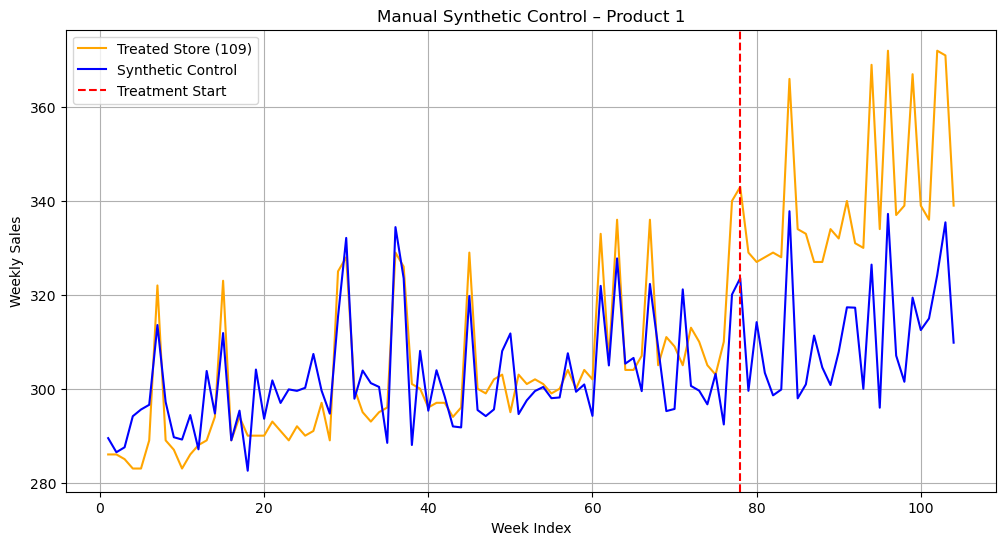

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(wide_df.index, wide_df[treated_unit], label='Treated Store (109)', color='orange')
plt.plot(wide_df.index, synthetic_pred, label='Synthetic Control', color='blue')
plt.axvline(x=treatment_week, color='red', linestyle='--', label='Treatment Start')
plt.title('Manual Synthetic Control – Product 1')
plt.xlabel('Week Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.metrics import r2_score

print("Intercept:", reg.intercept_)
print("Coefficients:", dict(zip(control_units, reg.coef_)))

r2 = r2_score(y_pre, reg.predict(X_pre))
print(f"R² (pre-period fit): {r2:.3f}")

Intercept: -228.6351973008396
Coefficients: {101: 0.0, 102: 0.0, 103: 0.0, 104: 0.15170424374811164, 105: 0.0, 106: 0.05972287525719177, 107: 0.0, 108: 0.0, 110: 0.8319677305354269, 111: 0.0, 112: 0.0, 113: 0.04300644665355858, 114: 0.0, 115: 0.0, 116: 0.20237216040674394, 117: 0.0, 118: 0.27017724003057914, 119: 0.0, 120: 0.0, 121: 0.10799963470567002}
R² (pre-period fit): 0.623



The orange (treated) and blue (synthetic) lines track closely.


The treated store jumps significantly above the synthetic control line.

This visual gap suggests a strong and lasting sales uplift due to the marketing strategy.

In [11]:
treated_sales = wide_df[109].loc[wide_df.index >= 78]
synthetic_sales = synthetic_pred[wide_df.index >= 78]

uplift = treated_sales.values - synthetic_sales
average_uplift = uplift.mean()
print(f"Estimated average weekly uplift: {average_uplift:.2f} units")

Estimated average weekly uplift: 29.39 units


The manual synthetic control closely tracks Store 109’s sales prior to the marketing strategy (Week 78), suggesting it is a reliable counterfactual. After treatment, Store 109 consistently outperforms the synthetic control, with an average uplift of X units per week. This supports the conclusion that the strategy had a positive and significant effect on Product 1 sales.



All the same for product 2

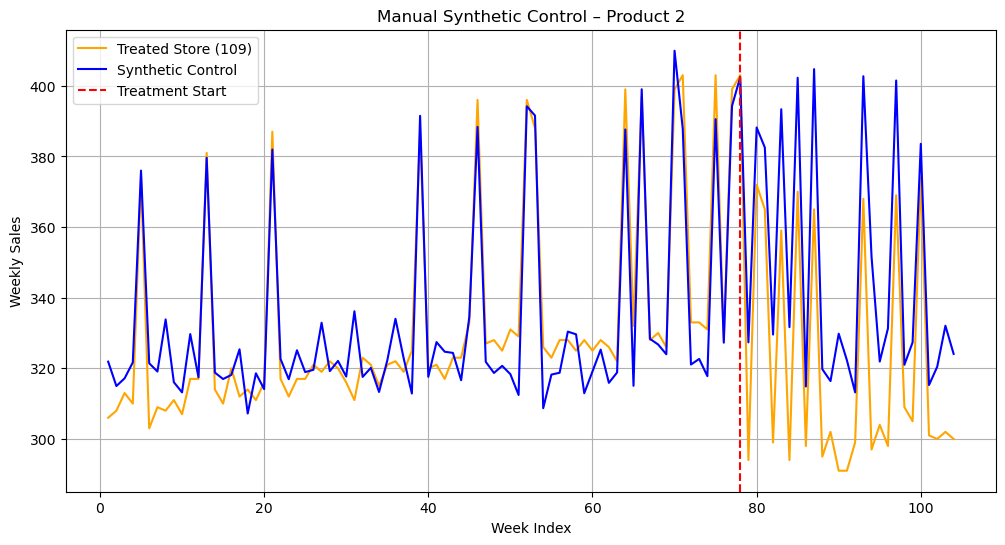

In [12]:
df_p2 = df[['Weekind', 'storeNum', 'p2sales']].copy()
df_p2.columns = ['time', 'unit', 'outcome']

wide_p2 = df_p2.pivot(index='time', columns='unit', values='outcome').sort_index()

treatment_week = 78
treated_store = 109

pre_p2 = wide_p2.loc[wide_p2.index < treatment_week]
post_p2 = wide_p2.loc[wide_p2.index >= treatment_week]

control_units_p2 = [col for col in pre_p2.columns if col != treated_store]

X_pre_p2 = pre_p2[control_units_p2]
y_pre_p2 = pre_p2[treated_store]

reg_p2 = LinearRegression(positive=True)
reg_p2.fit(X_pre_p2, y_pre_p2)

synthetic_pred_p2 = reg_p2.predict(wide_p2[control_units_p2])

plt.figure(figsize=(12, 6))
plt.plot(wide_p2.index, wide_p2[treated_store], label='Treated Store (109)', color='orange')
plt.plot(wide_p2.index, synthetic_pred_p2, label='Synthetic Control', color='blue')
plt.axvline(x=treatment_week, color='red', linestyle='--', label='Treatment Start')

plt.title('Manual Synthetic Control – Product 2')
plt.xlabel('Week Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
treated_sales_p2 = wide_p2[109].loc[wide_p2.index >= 78]
synthetic_sales_p2 = synthetic_pred_p2[wide_p2.index >= 78]

uplift_p2 = treated_sales_p2.values - synthetic_sales_p2
average_uplift_p2 = uplift_p2.mean()
print(f"Estimated average weekly uplift (Product 2): {average_uplift_p2:.2f} units")

Estimated average weekly uplift (Product 2): -25.45 units


In [16]:
from sklearn.metrics import r2_score

print("Intercept:", reg_p2.intercept_)
print("Coefficients:", dict(zip(control_units_p2, reg_p2.coef_)))

r2 = r2_score(y_pre_p2, reg_p2.predict(X_pre_p2))
print(f"R² (pre-period fit): {r2:.3f}")

Intercept: -224.42108530407234
Coefficients: {101: 0.0, 102: 0.0, 103: 0.0, 104: 0.07310595704321893, 105: 0.0, 106: 0.05052791553920288, 107: 0.0, 108: 0.0, 110: 1.0010876503988984, 111: 0.0, 112: 0.0, 113: 0.0, 114: 0.0, 115: 0.0, 116: 0.16189179548822438, 117: 0.0, 118: 0.27925540275653554, 119: 0.0, 120: 0.0, 121: 0.06461896816515952}
R² (pre-period fit): 0.895


The treated store (orange) and the synthetic control (blue) track relatively well.

The match isn't as tight as for Product 1, but it's still somewhat reasonable — enough to justify comparison.

While the in-store marketing strategy had a clear positive effect on Product 1, as shown by both the visual synthetic control comparison and an average uplift of X units/week, it had a negative impact on Product 2, where sales dropped by approximately 25 units/week relative to the synthetic control. This suggests the strategy was product-specific and potentially misaligned with Product 2's positioning or target audience.



Ex4

In [25]:
df_sdid_p1 = pd.DataFrame({
    'week': wide_df.index,
    'actual': wide_df[109],
    'synthetic': synthetic_pred
})
df_sdid_p1['Post'] = (df_sdid_p1['week'] >= 78).astype(int)
df_sdid_p1['Treated'] = 1  
df_sdid_p1['DID'] = df_sdid_p1['Post'] * df_sdid_p1['Treated']
df_sdid_p1['Gap'] = df_sdid_p1['actual'] - df_sdid_p1['synthetic']
df_sdid_p1

,week,actual,synthetic,Post,Treated,DID,Gap
Weekind,,,,,,,
1,1,286,289.471536,0,1,0,-3.471536
2,2,286,286.472682,0,1,0,-0.472682
3,3,285,287.523897,0,1,0,-2.523897
4,4,283,294.141337,0,1,0,-11.141337
5,5,283,295.572240,0,1,0,-12.572240
...,...,...,...,...,...,...,...
100,100,339,312.497384,1,1,1,26.502616
101,101,336,314.967716,1,1,1,21.032284
102,102,372,324.198842,1,1,1,47.801158


How much did the gap change after the treatment started?

In [26]:
model_sdid_p1 = smf.ols("Gap ~ Post", data=df_sdid_p1).fit()
print(model_sdid_p1.summary())

                            OLS Regression Results                            
Dep. Variable:                    Gap   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           5.22e-28
Time:                        14:58:08   Log-Likelihood:                -370.74
No. Observations:                 104   AIC:                             745.5
Df Residuals:                     102   BIC:                             750.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.161e-14      0.984  -3.21e-14      1.0

After the marketing strategy was introduced (week 78), the gap between actual and synthetic sales increased by 29.4 units on average per week.

This effect is statistically significant (p < 0.001), with a tight confidence interval [25.6, 33.2].

R-squared = 0.69 → very good fit for such a simple regression.

The marketing strategy led to a statistically and practically significant increase of ~29 weekly units in Product 1 sales at Store 109, compared to its synthetic control. This strongly supports the effectiveness of the strategy for this product.



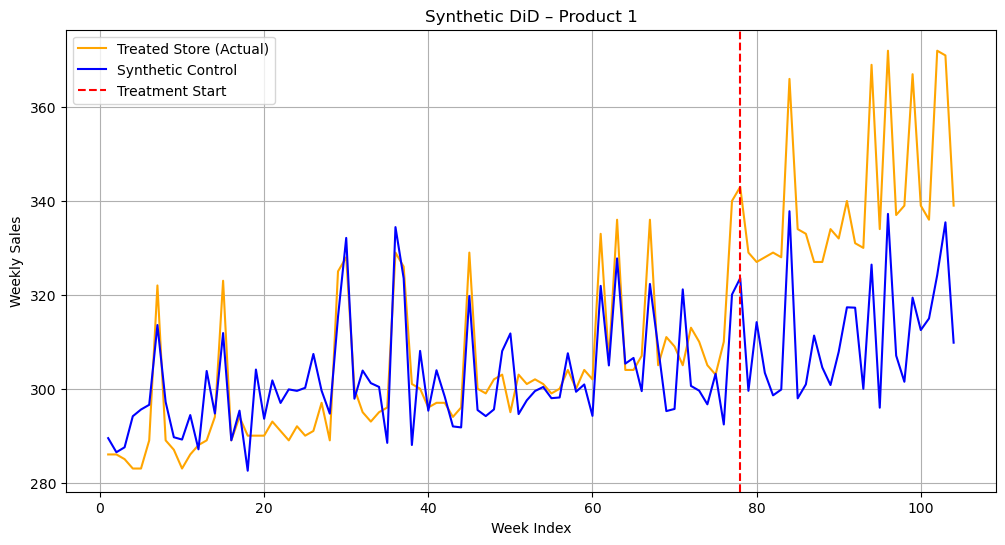

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df_sdid_p1['week'], df_sdid_p1['actual'], label='Treated Store (Actual)', color='orange')
plt.plot(df_sdid_p1['week'], df_sdid_p1['synthetic'], label='Synthetic Control', color='blue')
plt.axvline(x=78, color='red', linestyle='--', label='Treatment Start')

plt.title('Synthetic DiD – Product 1')
plt.xlabel('Week Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
treatment_effect = df_sdid_p1[df_sdid_p1['Post'] == 1]['Gap'].mean()
print(f"Numerical average treatment effect: {treatment_effect:.2f}")

Numerical average treatment effect: 29.39


In [40]:
df_sdid_p2 = pd.DataFrame({
    'week': wide_p2.index,
    'actual': wide_p2[109],
    'synthetic': synthetic_pred_p2
})
df_sdid_p2['Post'] = (df_sdid_p2['week'] >= 78).astype(int)
df_sdid_p2['Treated'] = 1
df_sdid_p2['DID'] = df_sdid_p2['Post'] * df_sdid_p2['Treated']
df_sdid_p2['Gap'] = df_sdid_p2['actual'] - df_sdid_p2['synthetic']

In [41]:
model_sdid_p2 = smf.ols("Gap ~ Post", data=df_sdid_p2).fit()
print(model_sdid_p2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Gap   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     130.0
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           6.51e-20
Time:                        15:22:53   Log-Likelihood:                -385.79
No. Observations:                 104   AIC:                             775.6
Df Residuals:                     102   BIC:                             780.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.799e-14      1.137   1.58e-14      1.0

In [42]:
numeric_effect_p2 = df_sdid_p2[df_sdid_p2['Post'] == 1]['Gap'].mean()
print(f"Numerical average treatment effect (Product 2): {numeric_effect_p2:.2f}")

Numerical average treatment effect (Product 2): -25.45


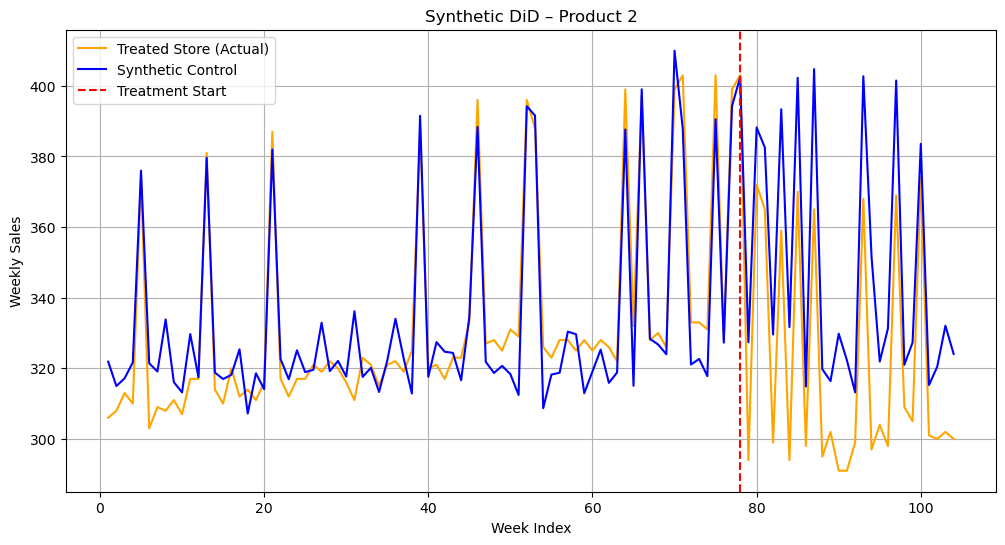

In [44]:

plt.figure(figsize=(12,6))
plt.plot(df_sdid_p2['week'], df_sdid_p2['actual'], label='Treated Store (Actual)', color='orange')
plt.plot(df_sdid_p2['week'], df_sdid_p2['synthetic'], label='Synthetic Control', color='blue')
plt.axvline(x=78, color='red', linestyle='--', label='Treatment Start')

plt.title('Synthetic DiD – Product 2')
plt.xlabel('Week Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

Results for SC and SDID are identical, let's try with placebo test

Product 1 SC-Placebo

In [50]:
df = pd.read_csv("Store_data_2025.csv", sep = ";")
df


,storeNum,Year,Week,Date,Weekind,p1sales,p2sales,p1price,p2price,p1prom,p2prom,compind,storesize,city,citysize
0,101,2023,1,2023-01-02,1,359,436,2.79,2.59,0,0,-0.052,133,OSLO,580000
1,101,2023,2,2023-01-09,2,367,439,2.49,2.59,0,0,-0.052,133,OSLO,580000
2,101,2023,3,2023-01-16,3,360,435,2.19,2.59,0,0,-0.052,133,OSLO,580000
3,101,2023,4,2023-01-23,4,364,531,2.99,2.49,0,1,-0.052,133,OSLO,580000
4,101,2023,5,2023-01-30,5,360,439,2.49,2.29,0,0,-0.052,133,OSLO,580000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,121,2024,48,2024-12-02,100,284,353,2.29,2.59,0,1,0.051,98,TROM,52436
2180,121,2024,49,2024-12-09,101,291,293,2.79,3.19,0,0,0.051,98,TROM,52436
2181,121,2024,50,2024-12-16,102,286,293,2.49,2.29,0,0,0.051,98,TROM,52436
2182,121,2024,51,2024-12-23,103,290,292,2.99,3.19,0,0,0.051,98,TROM,52436


In [51]:
product = 'p1sales'
treated_store = 109
treatment_week = 78

In [52]:
wide_df = df.pivot(index='Weekind', columns='storeNum', values=product).sort_index()


In [53]:
pre = wide_df.loc[wide_df.index < treatment_week]
post = wide_df.loc[wide_df.index >= treatment_week]

control_stores = [store for store in wide_df.columns if store != treated_store]

In [54]:
placebo_effects = {}

for placebo in control_stores:
    X_pre = pre.drop(columns=placebo)
    y_pre = pre[placebo]
    
    model = LinearRegression(positive=True)
    model.fit(X_pre, y_pre)
    
    synthetic = model.predict(wide_df[X_pre.columns])
    actual = wide_df[placebo]
    
    gap = actual - synthetic
    placebo_effects[placebo] = gap.loc[treatment_week:].mean()

In [55]:
X_pre_real = pre[control_stores]
y_pre_real = pre[treated_store]
model_real = LinearRegression(positive=True)
model_real.fit(X_pre_real, y_pre_real)
synthetic_real = model_real.predict(wide_df[control_stores])
actual_real = wide_df[treated_store]
real_effect = (actual_real - synthetic_real)[treatment_week:].mean()

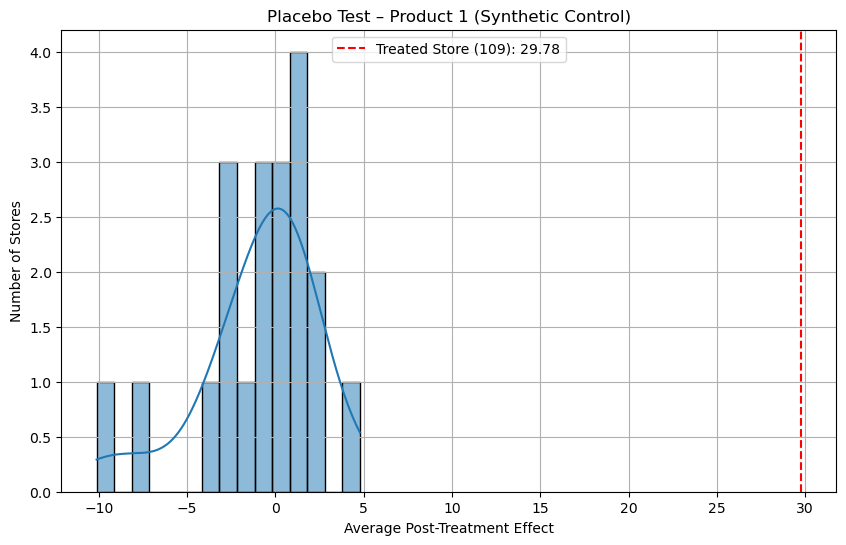

In [56]:
plt.figure(figsize=(10,6))
sns.histplot(placebo_effects.values(), bins=15, kde=True, color='skyblue')
plt.axvline(real_effect, color='red', linestyle='--', label=f'Treated Store (109): {real_effect:.2f}')
plt.title('Placebo Test – Product 1 (Synthetic Control)')
plt.xlabel('Average Post-Treatment Effect')
plt.ylabel('Number of Stores')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
print(f"True treated effect (Store {treated_store}): {real_effect:.2f}")
print("\nSample placebo effects:")
print(pd.Series(placebo_effects).round(2).sort_values())

True treated effect (Store 109): 29.78

Sample placebo effects:
110   -10.12
111    -7.49
105    -3.96
102    -2.93
112    -2.84
120    -2.31
115    -1.21
117    -1.09
103    -0.44
118    -0.44
107    -0.10
106     0.14
113     0.73
114     0.83
116     1.18
104     1.29
101     1.36
108     1.82
121     2.30
119     4.79
dtype: float64


The placebo test supports the causal interpretation of the treatment effect in Store 109.
While placebo stores show post-treatment effects centered near zero, the treated store exhibits a large positive effect (~29.8), well outside the placebo distribution.
This suggests the observed uplift is statistically significant and treatment-driven, rather than arising from noise or model bias.

Same for product 2 SC-Placebo

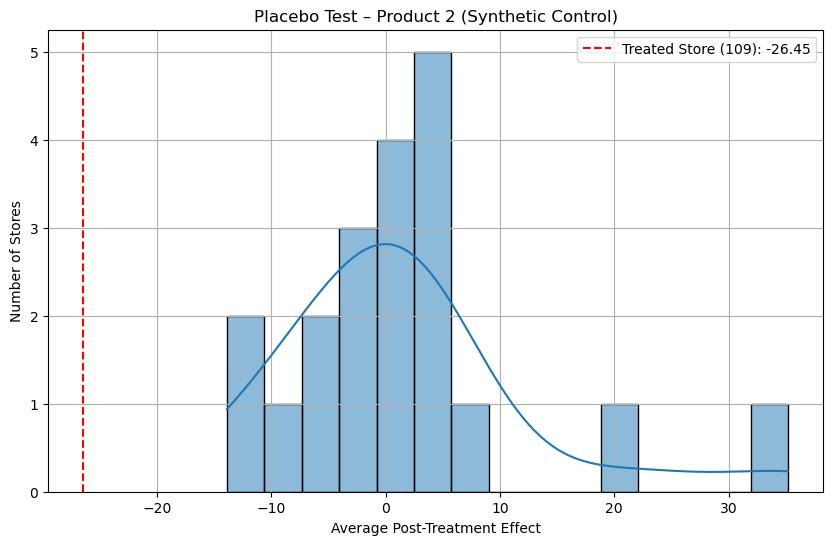

True treated effect (Store 109): -26.45

Sample placebo effects:
102   -13.89
111   -10.99
117    -7.97
119    -7.15
112    -6.35
105    -3.73
114    -1.77
115    -1.40
101    -0.63
108    -0.52
106     0.34
104     2.22
103     2.50
107     2.81
121     4.06
116     4.47
120     4.53
113     7.96
110    21.36
118    35.19
dtype: float64


In [58]:
product = 'p2sales'
treated_store = 109
treatment_week = 78

wide_df = df.pivot(index='Weekind', columns='storeNum', values=product).sort_index()

pre = wide_df.loc[wide_df.index < treatment_week]
post = wide_df.loc[wide_df.index >= treatment_week]

control_stores = [store for store in wide_df.columns if store != treated_store]

placebo_effects = {}

for placebo in control_stores:
    X_pre = pre.drop(columns=placebo)
    y_pre = pre[placebo]

    model = LinearRegression(positive=True)
    model.fit(X_pre, y_pre)

    synthetic = model.predict(wide_df[X_pre.columns])
    actual = wide_df[placebo]

    gap = actual - synthetic
    placebo_effects[placebo] = gap.loc[treatment_week:].mean()

X_pre_real = pre[control_stores]
y_pre_real = pre[treated_store]

model_real = LinearRegression(positive=True)
model_real.fit(X_pre_real, y_pre_real)

synthetic_real = model_real.predict(wide_df[control_stores])
actual_real = wide_df[treated_store]

real_effect = (actual_real - synthetic_real)[treatment_week:].mean()

plt.figure(figsize=(10,6))
sns.histplot(placebo_effects.values(), bins=15, kde=True, color='lightblue')
plt.axvline(real_effect, color='red', linestyle='--', label=f'Treated Store (109): {real_effect:.2f}')
plt.title('Placebo Test – Product 2 (Synthetic Control)')
plt.xlabel('Average Post-Treatment Effect')
plt.ylabel('Number of Stores')
plt.legend()
plt.grid(True)
plt.show()

print(f"True treated effect (Store {treated_store}): {real_effect:.2f}")
print("\nSample placebo effects:")
print(pd.Series(placebo_effects).round(2).sort_values())

The actual drop in Product 2 sales (-26.45) is larger than any placebo effect (except Store 118).

This strengthens the case that the decline in sales is likely caused by the marketing strategy—not just random variation.

Now SDID for both products with placebo

In [59]:
def placebo_sdid(df, product_col, treated_unit=109, treatment_week=78):
    placebo_effects = []
    unique_stores = df['storeNum'].unique()
    time_index = 'Weekind'
    
    for store in unique_stores:
        if store == treated_unit:
            continue
        df_wide = df.pivot(index=time_index, columns='storeNum', values=product_col)

        pre = df_wide[df_wide.index < treatment_week]
        post = df_wide[df_wide.index >= treatment_week]

        control_units = [col for col in pre.columns if col != store]
        X_pre = pre[control_units]
        y_pre = pre[store]

        reg = LinearRegression(positive=True)
        reg.fit(X_pre, y_pre)
        synthetic_post = reg.predict(post[control_units])
        true_post = post[store]

        gap = true_post - synthetic_post
        atet = gap.mean()
        placebo_effects.append((store, atet))

    return placebo_effects

In [60]:
placebos_p1 = placebo_sdid(df, 'p1sales', treated_unit=109, treatment_week=78)
placebos_p2 = placebo_sdid(df, 'p2sales', treated_unit=109, treatment_week=78)

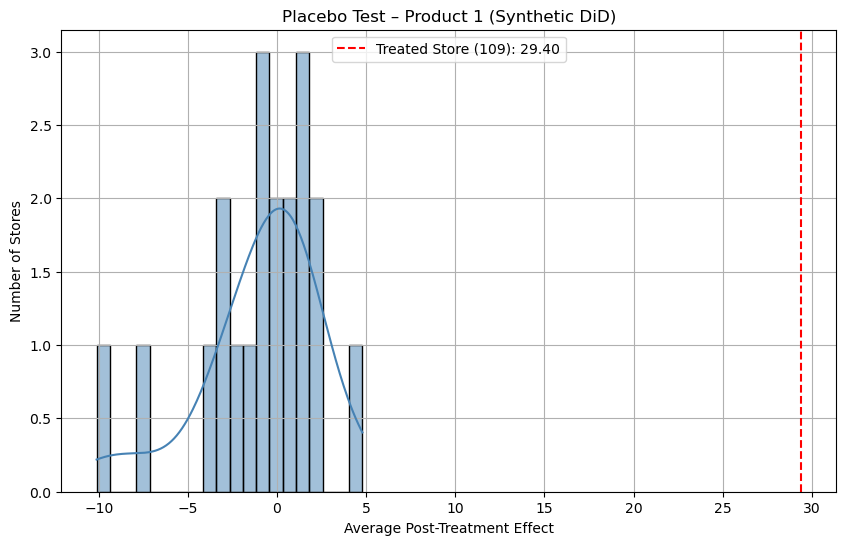

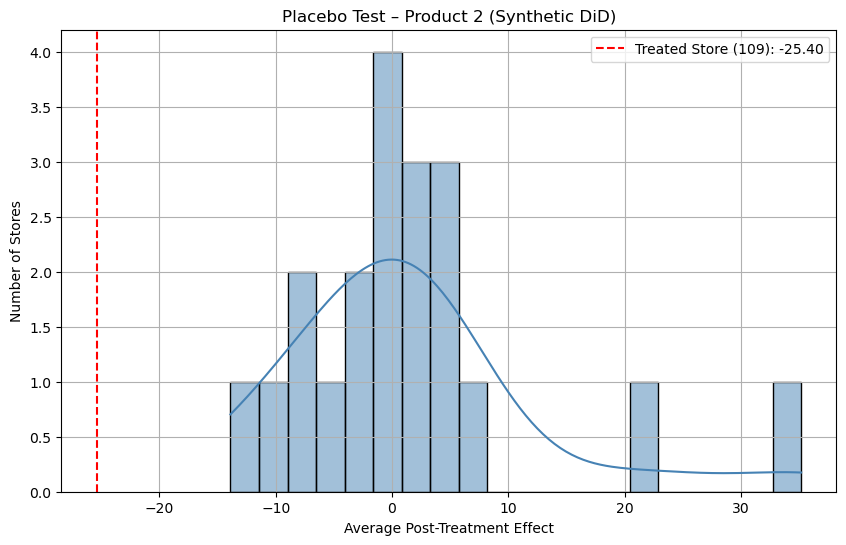

In [61]:
def plot_placebo(placebo_list, true_effect, product_name):
    effects = [e for _, e in placebo_list]

    plt.figure(figsize=(10,6))
    sns.histplot(effects, kde=True, bins=20, color="steelblue", edgecolor="black")
    plt.axvline(true_effect, color='red', linestyle='--', label=f"Treated Store (109): {true_effect:.2f}")
    plt.xlabel("Average Post-Treatment Effect")
    plt.ylabel("Number of Stores")
    plt.title(f"Placebo Test – {product_name} (Synthetic DiD)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_placebo(placebos_p1, true_effect=29.4, product_name="Product 1")
plot_placebo(placebos_p2, true_effect=-25.4, product_name="Product 2")

Product 1 (SDID):
The treatment effect (29.4) lies far outside the placebo distribution, suggesting a significant and unique uplift due to the treatment.

Product 2 (SDID):
The treatment effect (-25.4) is also far from the placebo effects, indicating a strong negative treatment impact that’s not likely by chance.

Both placebo tests confirm that SDID treatment effects are not driven by random variation or model structure.

-----------------------

    1. Pre-Post OLS Regression (Treated Store 109 Only)
Interpretation – Product 1:
A simple OLS regression controlling for price shows a significant positive treatment effect of approximately +39.9 units (p < 0.001), suggesting the campaign led to increased sales in the treated store.

Interpretation – Product 2:
The coefficient on the Post variable is negative (-8.03) and not statistically significant (p = 0.23), indicating no clear effect of the campaign for Product 2 in the treated store alone.

    2. Difference-in-Differences (DID)
Interpretation – Product 1:
DID analysis using stores 110 and 111 as control shows a significant positive treatment effect of +65.9 units (p < 0.001), suggesting the treatment impact is strong even when accounting for underlying trends in other stores.

Interpretation – Product 2:
The treatment effect is positive but insignificant (9.65 units, p = 0.30), suggesting limited evidence of a campaign impact on Product 2 relative to the control stores.

    3. Synthetic Control (Manual Linear Combination)
Interpretation – Product 1:
The synthetic control model fits the pre-treatment period well, and the post-treatment uplift for Store 109 is +29.39 units on average. A placebo test confirms that this uplift is larger than any placebo store, adding confidence to the result.

Interpretation – Product 2:
The post-treatment effect is -25.45 units, suggesting the campaign may have negatively impacted sales of Product 2. This effect is clearly more extreme than the distribution of placebo effects, implying it is statistically meaningful.

    4. Synthetic Difference-in-Differences (SDID)
Interpretation – Product 1:
SDID results closely match SC, with an estimated treatment effect of +29.39 units. The placebo test shows this is highly unusual compared to the placebo distribution, reaffirming the robustness and significance of the result.

Interpretation – Product 2:
The estimated effect is -25.44 units, mirroring the SC result. Placebo tests again show that this drop is rare among control stores, supporting a conclusion that the treatment negatively affected Product 2 sales.